## Area Plot
Also know as area charty or area graph, it's commonly used to represent cumulated totals. This plot is based ont he line plot

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

Pandas has a built-in implementation of matplotlib, which makes plotting much easier for us. Let's try it out

In [2]:
df = pd.read_csv(r'./college/historical_tuition.csv') # load data
df.head()

,type,year,tuition_type,tuition_cost
0,All Institutions,1985-86,All Constant,10893
1,All Institutions,1985-86,4 Year Constant,12274
2,All Institutions,1985-86,2 Year Constant,7508
3,All Institutions,1985-86,All Current,4885
4,All Institutions,1985-86,4 Year Current,5504


In [3]:
df.type.unique() # get unique values for the 'type' column

array(['All Institutions', 'Public', 'Private'], dtype=object)

In [4]:
cond = df.tuition_type == 'All Current'
all_colleges = df[cond]

all_colleges.sort_values(by=['year'], ascending=True)
all_colleges.head()

,type,year,tuition_type,tuition_cost
3,All Institutions,1985-86,All Current,4885
9,All Institutions,1995-96,All Current,8800
15,All Institutions,2000-01,All Current,10820
21,All Institutions,2001-02,All Current,11380
27,All Institutions,2002-03,All Current,12014


In [5]:
private_colleges = all_colleges[all_colleges.type=='Private']
private_colleges = private_colleges[['year', 'tuition_cost']]
private_colleges.head()

,year,tuition_cost
195,1985-86,8885
201,1995-96,17208
207,2000-01,21373
213,2001-02,22413
219,2002-03,23340


In [6]:
public_colleges = all_colleges[all_colleges.type=='Public']
public_colleges = public_colleges[['year', 'tuition_cost']]
public_colleges.head()

,year,tuition_cost
117,1985-86,3571
123,1995-96,6256
129,2000-01,7586
135,2001-02,8022
141,2002-03,8502


In [7]:
public_private_tuition = pd.DataFrame({
    'Public': public_colleges['tuition_cost'].tolist(),
    'Private': private_colleges['tuition_cost'].tolist(),
    'Year':private_colleges['year'].tolist(),
})
public_private_tuition.head()

,Public,Private,Year
0,3571,8885,1985-86
1,6256,17208,1995-96
2,7586,21373,2000-01
3,8022,22413,2001-02
4,8502,23340,2002-03


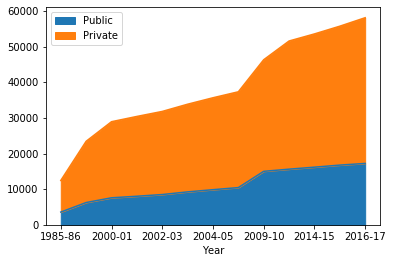

In [8]:
ax = public_private_tuition.plot(kind='area', x='Year')